## What is central limit theorem? 

The distribution of the sum of independent samples consisting of `n` points drawn from an arbitrary distribution approach a normal distribution as `n` increases.

If the distribution of the values has a mean and standard deviation, the distribution of sum is approximately given by $ N(n\mu, n\sigma^2)$


Some points to keep in mind: 
- The values are to be drawn independently
- The values have to come from same distribution 
- The underlying distribution should have finite mean and variance 
- The rate convergence to the normal distribution depends on the skewness of the parent distribution. 


We start with some crazy distribution that has got nothing to do with a normal distribution. Sample points from that distribution with some arbitrary sample size, following which we plot the sample mean (or sample sum) on a frequency table -- repeat this lot of times (tending to infinity) we end up getting a normal distribution of sample means! 

**The Central Limit Theorem explains the prevalence of normal distributions in the natural world.** This limit is central to the ideas of hypothesis testing and helpful for estimating confidence intervals.

* [Khan Academy video explaining this](https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-mean/v/central-limit-theorem)

Below a simple python experiment to show this in action.

In [2]:
import random as rand 
import numpy as np 
from scipy import stats 

# High DPI rendering for mac
%config InlineBackend.figure_format = 'retina'

# Plot matplotlib plots with white background: 
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plot_params = {
'font.size' : 10,
'axes.titlesize' : 10,
'axes.labelsize' : 10,
'axes.labelweight' : 'bold',
'xtick.labelsize' : 10,
'ytick.labelsize' : 10,
}
 
plt.rcParams.update(plot_params)

sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [4]:
from numpy.random import default_rng
rng = default_rng(42)

### 1. Discrete distribution 

For this case let's assume we have a dice which is unfair and does not ever land on 3 and 5, and lands more on 2 and 6. We can build this skewed probability into the dice using the weights.

In [4]:
dice = np.arange(1,7) # Dice numbers possible 
probabilities = [0.2, 0.3, 0.0, 0.2, 0.0, 0.3] #Weighted probabilites for the numbers 

Define a function to draw samples from the dice and calculate the mean. 

In [5]:
# Draw sample size = n, take the mean and plot the frequencies 
def sample_draw_mean(_trials=1000, _sample_size=1):
    sample_mean_trials = []
    # Sample a number from the distribution equal to trials
    for i in range(_trials):
        sample = rng.choice(dice, size=_sample_size, p=probabilities, replace=True)
        sample_mean_trials.append(np.mean(sample))
    return sample_mean_trials

Drawing `sample_size`=1 from the distribution multiple times, i.e. equal to `num_of_trials` variable

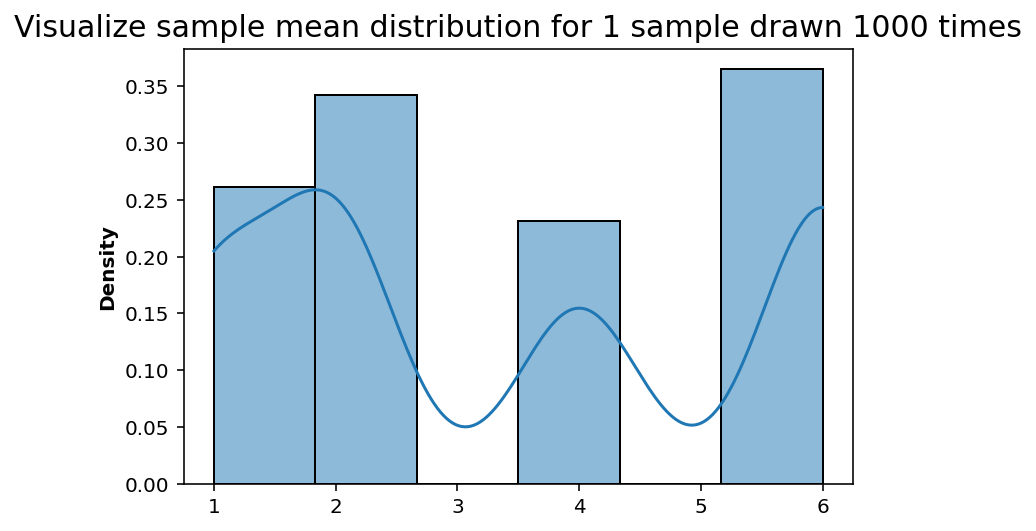

In [6]:
num_of_trials = 1000
sample_size = 1
sns.histplot(sample_draw_mean(_trials=num_of_trials, _sample_size=sample_size), bins=len(dice), stat='density', kde=True);
plt.title('Visualize sample mean distribution for {} sample drawn {} times'.format(sample_size, num_of_trials), fontsize=15);

For sample size of 1, the frequency of numbers rolled by the unfair dice relates to the probability we have set above. However we can start to define samples from that distribution wherein, instead of single number we draw (for example 4). 

#### Plotting sampling distribution of sample mean

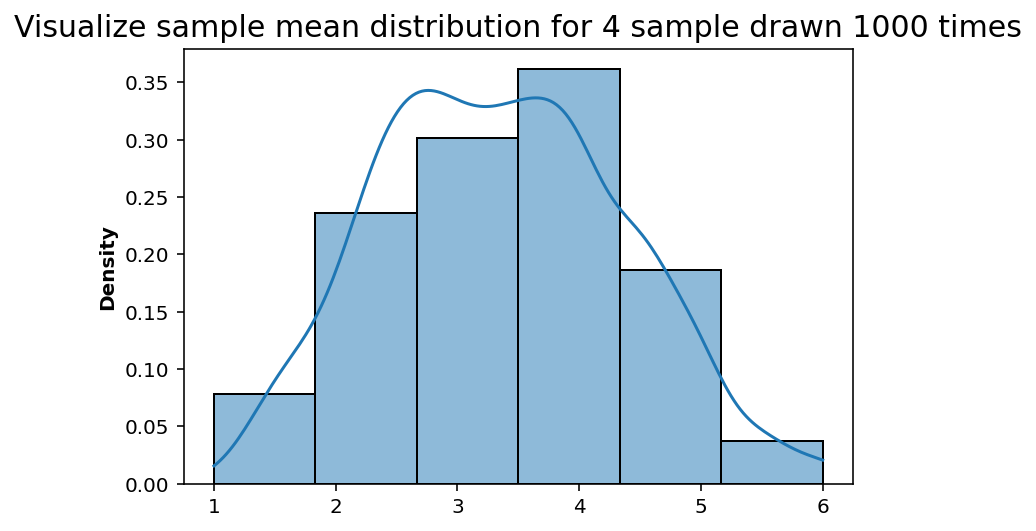

In [7]:
num_of_trials = 1000
sample_size = 4
sns.histplot(sample_draw_mean(_trials=num_of_trials, _sample_size=sample_size), bins=len(dice), stat='density', kde=True);
plt.title('Visualize sample mean distribution for {} sample drawn {} times'.format(sample_size, num_of_trials), fontsize=15);

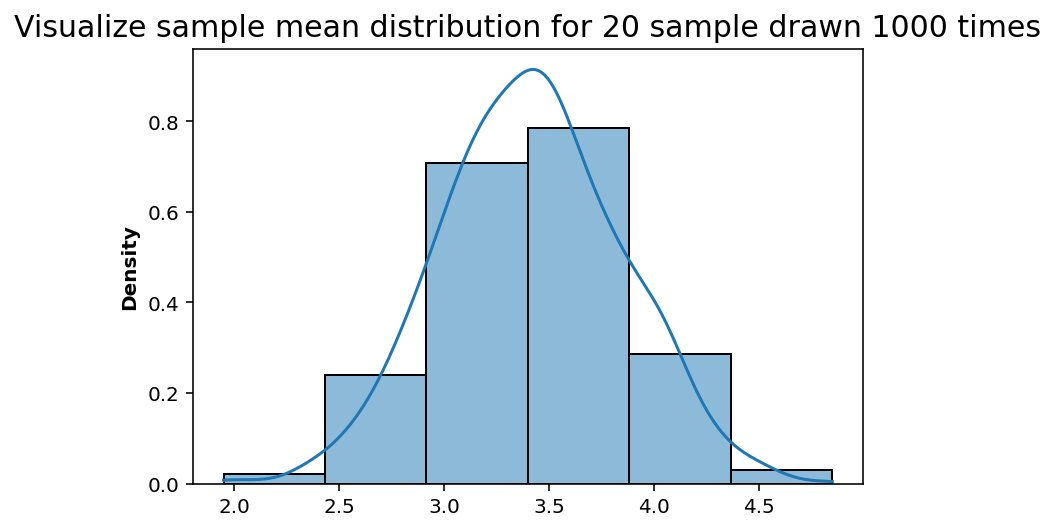

In [8]:
num_of_trials = 1000
sample_size = 20
sns.histplot(sample_draw_mean(_trials=num_of_trials, _sample_size=sample_size), bins=len(dice), stat='density', kde=True);
plt.title('Visualize sample mean distribution for {} sample drawn {} times'.format(sample_size, num_of_trials), fontsize=15);

As we keep plotting the frequency distribution for the sample mean it starts to approach the normal distribution!

In [9]:
def normal_distribution(x, mean=0, sigma=1):
    out = (1/np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-1/2 * ((x - mean)/sigma)**2)
    return(out)

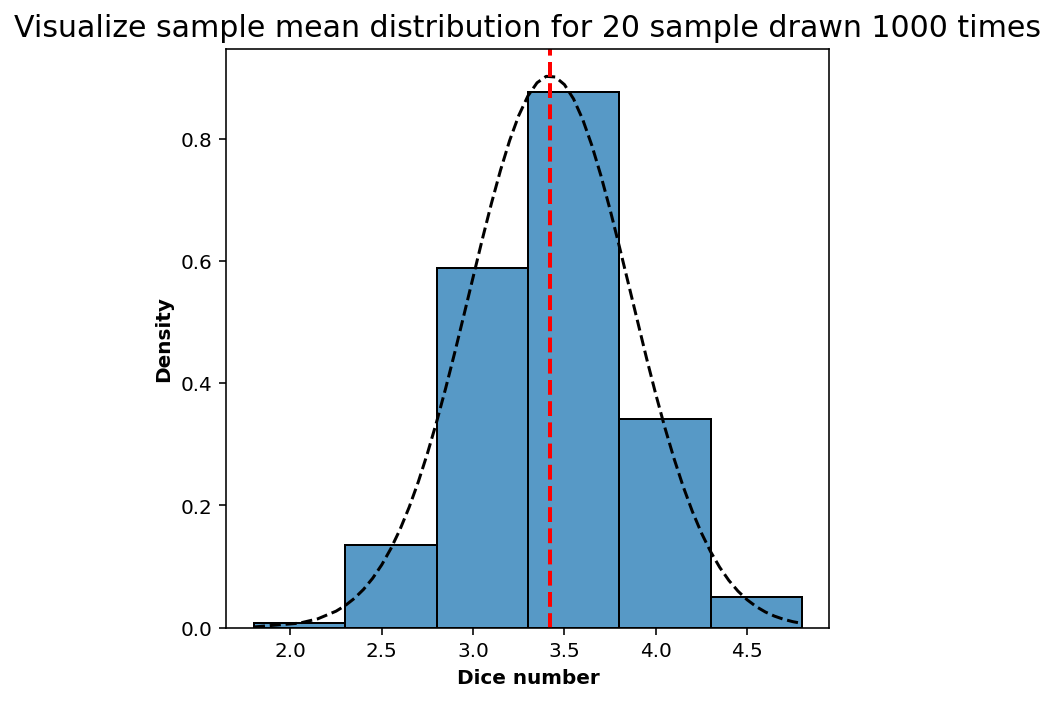

In [10]:
num_of_trials = 1000
sample_size = 20

fig, ax = plt.subplots(1,1, figsize=(5,5))
sample_means = np.sort(sample_draw_mean(_trials=num_of_trials, _sample_size=sample_size))
# Plot histogram density
sns.histplot(sample_means, bins=len(dice), stat='density', kde=False, ax=ax)
# Plot normal distribution
ax.plot(sample_means, normal_distribution(sample_means, np.mean(sample_means), np.std(sample_means)), color='black', linestyle='--', label='Normal Distribution')
# Plot sample mean
ax.axvline(np.mean(sample_means), color='red', linestyle='--', linewidth=2.0, label='Sample Mean')
ax.set_xlabel('Dice number')
plt.title('Visualize sample mean distribution for {} sample drawn {} times'.format(sample_size, num_of_trials), fontsize=15);
plt.tight_layout()

### 2. Continuous distibution

In [11]:
# Define an exponential distribution
beta = 5.0 
num_of_trials = 1000
sample_size_list = [1, 10, 100, 500]

In [12]:
def generate_mean_samples(_beta, _iter, _sample_size):
    samples_mean = []
    for i in range(_iter):
        sample_numbers = np.random.exponential(_beta, _sample_size)
        samples_mean.append(np.mean(sample_numbers))
    return(samples_mean)

In [13]:
sample_plot_list = []
for n in sample_size_list:
    sample_plot_list.append((n, generate_mean_samples(beta, num_of_trials, n)))

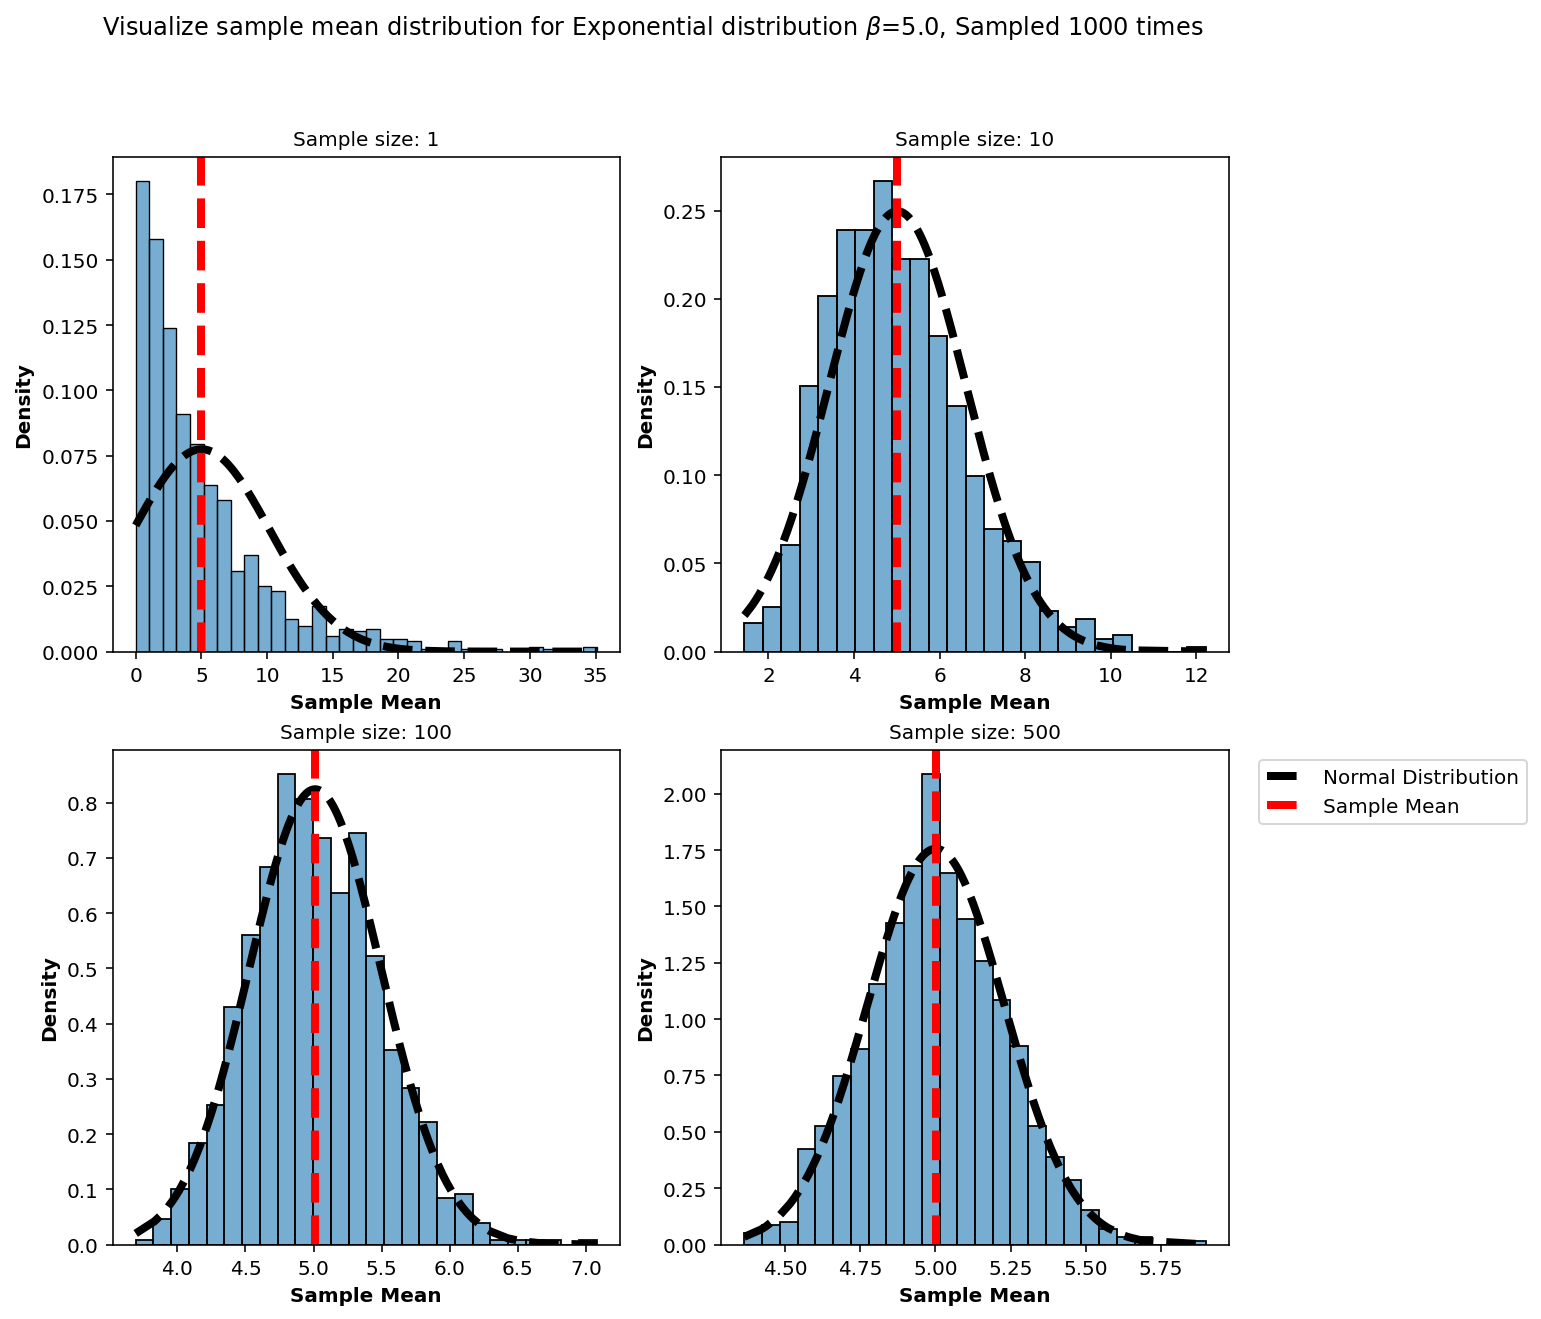

In [14]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
for i, entry in enumerate(sample_plot_list): 
    sns.histplot(entry[1], stat='density', alpha=0.6, kde=False, ax=ax[i])
    ax[i].set_title('Sample size: {}'.format(entry[0]))
    sample_mean = np.mean(entry[1])
    sample_std = np.std(entry[1])
    normal_x = np.sort(entry[1])
    # Plot normal distribution 
    ax[i].plot(normal_x, normal_distribution(normal_x,sample_mean,sample_std), linewidth=4.0, color='black', linestyle='--', label='Normal Distribution')
    
    # Sample mean
    ax[i].axvline(sample_mean, color='red', linestyle='--', linewidth=4.0, label='Sample Mean')
    ax[i].set_xlabel('Sample Mean')
plt.suptitle(r'Visualize sample mean distribution for Exponential distribution $\beta$={}, Sampled {} times'.format(beta, num_of_trials));
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.tight_layout()

### 3. Is it a fair coin? 

**Estimate coin toss probability**

A coin is flipped 30 times, you get 22 heads. Find if the coin is fair or not. That is, if the probability of getting heads-tails is 50%. 

This can be solved by estimating the probability of getting heads / tails provided the above condition is met. 

Since we can model the coin toss process (a priori model) using Bernoulli's distribution, we will estimate the probability of 22 heads considering a fair coin. This will be our Null Hypothesis. 

**Null hypothesis:**
The null hypothesis is a model of the system based on the assumption that the apparent effect was actually due to chance. 

Assuming a bernoulli distribution: 

$$X_{i} \sim B(p)$$

$$ P(N_H=22) = \binom nx p^{22}(1-p)^{30-22} $$

By central limit theorem: 
$$ \sum_{i=1}^{30}{X_{i}} \sim N(30p, 30(1-p)) $$

From maximum likelihood estimate, more detailts on MLE can be found [here.](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading10b.pdf):

$$ \hat{p} = 0.73 $$

**Estimate 95% confidence interval:**
* Assuming a normal distribution: 
$$ \mu \pm 1.96 \sigma $$

$$ 30\hat{p} \pm 1.96 \sqrt{ 30 * (1-\hat{p}) } $$

$$ 22 \pm 1.96 \sqrt{( 30 * 0.26 )} = (16.4, 27.58) $$

In [5]:
rng = np.random.default_rng(42)

Define a `numpy.random.choice` function to simulate coin tosses. This can repeated to 30 times.

In [7]:
sampling_30 = rng.choice([0,1], replace=True, size=30) # we can randint(2) here as well. 

`np.where` is used to find the entries with heads, that way for each 30 coin tosses we can estimate how many heads are there. In this case we are treating heads as 1 and tails as 0

In [8]:
len(np.where(sampling_30 == 1)[0]) # or just sum the list since all we have is 1 / 0 

15

In [9]:
sum(sampling_30)

15

Setup the problem to perform multiple trails of 30 coin tosses, when done with the trials we will keep an account of how many of those trials had 22 heads. 

In [17]:
heads_condition = 22
num_heads_list = []
constraint_satisy = 0
num_trials = 5000

In [18]:
for _ in range(num_trials):
    sampling_30 = rng.choice([0,1], replace=True, size=30, p=[0.50,0.50]) # A-priori fair coin toss model 
    number_of_heads = len(np.where(sampling_30 == 1)[0])
    num_heads_list.append(number_of_heads)
    
    if number_of_heads == heads_condition:
        constraint_satisy = constraint_satisy + 1  
        
num_heads_list = np.array(num_heads_list)

In [19]:
len(num_heads_list)

5000

Defining a normal distribution function from `scipy` or we could also use the function defined previously. 

In [20]:
from scipy.stats import norm
x = np.linspace(min(num_heads_list), max(num_heads_list))
std_norm_coin = norm(np.mean(num_heads_list), np.std(num_heads_list))

In [21]:
quantiles_95_confidence = np.quantile(num_heads_list, [0.025, 0.975])

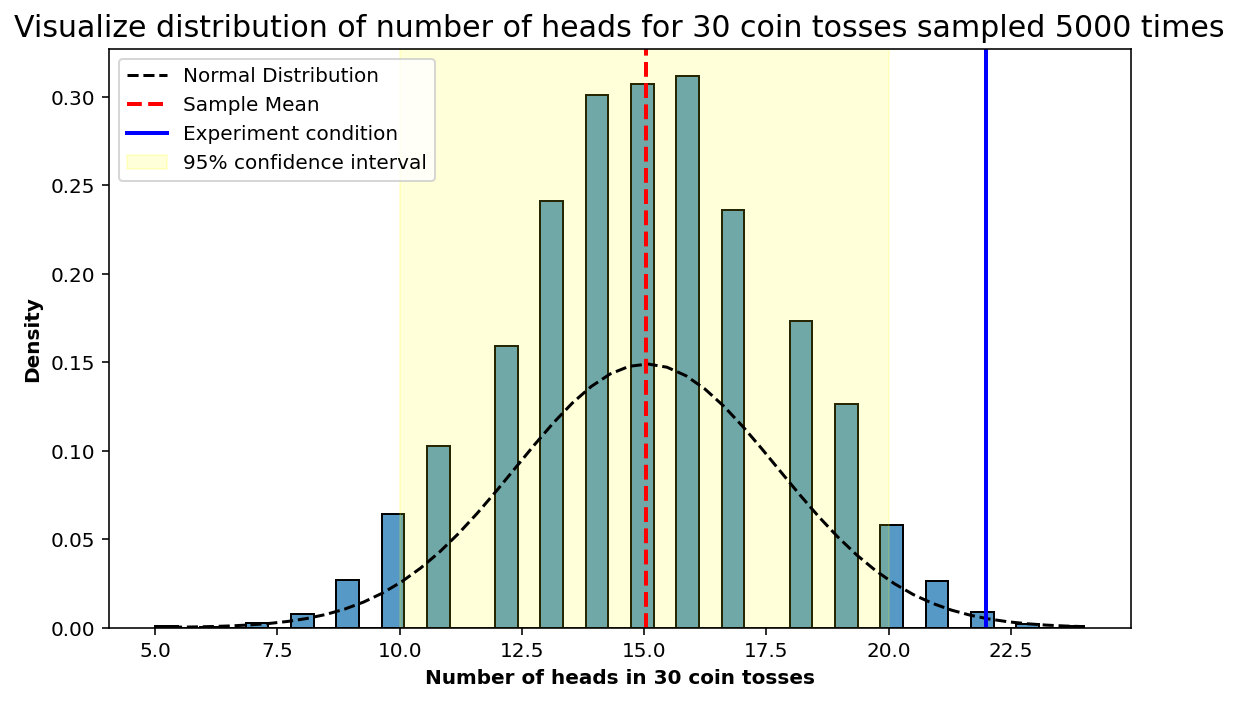

In [24]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

# Plot histogram density
sns.histplot(num_heads_list, stat='density', kde=False, ax=ax)

# Plot normal distribution
ax.plot(x, std_norm_coin.pdf(x), color='black', linestyle='--', label='Normal Distribution')

# Plot sample mean
ax.axvline(np.mean(num_heads_list), color='red', linestyle='--', linewidth=2.0, label='Sample Mean')
ax.axvline(heads_condition, color='blue', linestyle='-', linewidth=2.0, label='Experiment condition')


# Plot confidence interval 
ax.axvspan(quantiles_95_confidence[0], quantiles_95_confidence[1], alpha=0.15, color='yellow',label='95% confidence interval')

ax.set_xlabel('Number of heads in 30 coin tosses')
plt.title('Visualize distribution of number of heads for 30 coin tosses sampled {} times'.format(num_trials), fontsize=15);
plt.legend(loc="upper left")
plt.tight_layout()

**p-value estimate**

In [25]:
p_value = constraint_satisy / num_trials
print(p_value)

0.0042


Since p-value is less than 0.05, this means the coin is **not fair**

For most problems, we only care about the order of magnitude: if the p-value is smaller that 1/100, the effect is likely to be real; if it is greater than 1/10, probably not.  If you think there is a difference between a 4.8% (significant!) and 5.2% (not significant!), you are taking it too seriously.